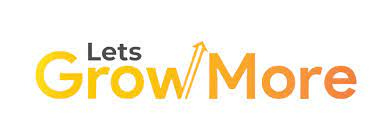



# Lets Grow More Internship(VIP) 


# Author - D Daniel Vincent Raj

# Title - Perform Exploratory Data Analysis on dataset- Terrorism(Task-1) 
# INTERMEDIATE LEVEL TASK

Exploratory data analysis: This involves using graphical and visual techniques to explore and discover patterns and relationships in a dataset, such as scatter plots, histograms, and box plots.

In [57]:
#import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
import seaborn as sns

In [29]:
df= pd.read_csv("globalterrorismdb_0718dist.csv")
df.head(10)

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqu� to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [30]:
df.shape #rows,cols

(181691, 135)

In [31]:
# Clean and preprocess the data
df.drop_duplicates(inplace=True) # remove duplicates
df.dropna(subset=['eventid', 'iyear', 'imonth', 'iday', 'country_txt'], inplace=True) # remove missing values

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 188.5+ MB


In [33]:
df = df[['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city', 'latitude', 'longitude', 'attacktype1_txt', 'nkill', 'nwound', 'gname']]# select relevant columns 

In [34]:
df.shape

(181691, 13)

In [35]:
# Explore the variables

In [36]:
print(df.describe())

            eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            latitude     longitude          nkill         nwound  
count  177135.000000  1.771340e+05  171378.000000  165380.000000  
mean       23.498343 -4.586957e+02       2.403272       3.167668  
std        18.569242  2.047790e+05      11.545741      35.949392  
min       -53.154613 -8.618590e+07       0.000000       0.000000  
25%        11.510046  4.545640e+00       0.000000   

In [37]:
print(df['iyear'].value_counts()) # frequency of attacks by year
#show the number of attack taken place in year.

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64


In [38]:
print(df['country_txt'].value_counts()) # frequency of attacks by country
#attacks in a country

Iraq             24636
Pakistan         14368
Afghanistan      12731
India            11960
Colombia          8306
                 ...  
North Korea          1
Vatican City         1
International        1
Andorra              1
New Hebrides         1
Name: country_txt, Length: 205, dtype: int64


In [39]:
print(df['region_txt'].value_counts()) # frequency of attacks by region

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64


In [19]:
# Visualize the data

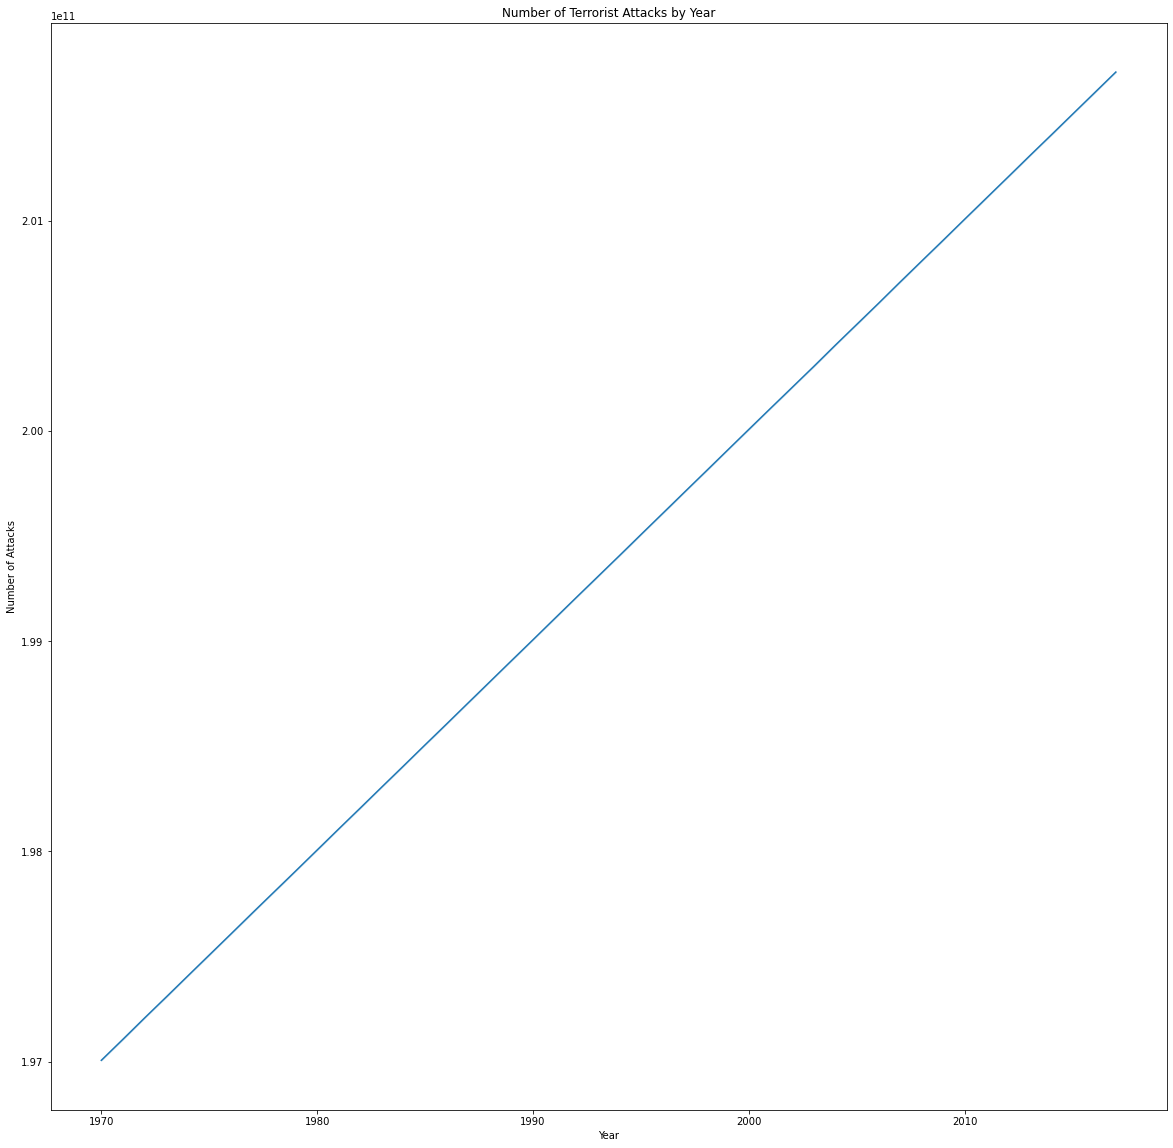

In [20]:
plt.figure(figsize=(20,20))
sns.lineplot(data=df, x='iyear', y='eventid')
plt.title('Number of Terrorist Attacks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()


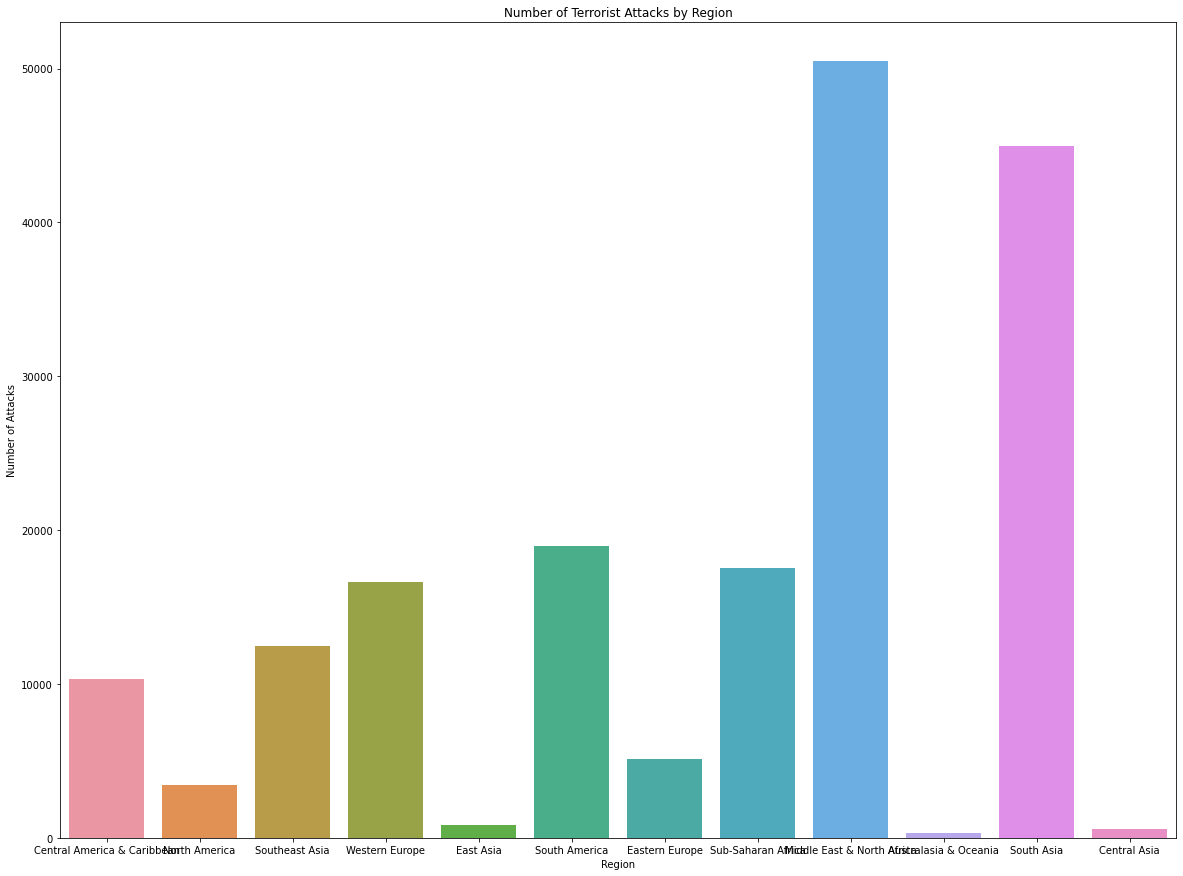

In [21]:
plt.figure(figsize=(20,15))
sns.countplot(data=df, x='region_txt')
plt.title('Number of Terrorist Attacks by Region')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.show()


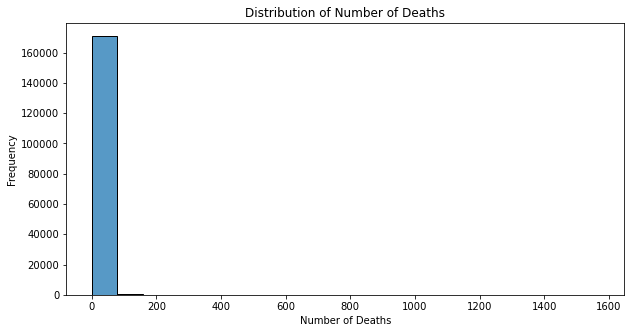

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='nkill',bins=20)
plt.title('Distribution of Number of Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.show()

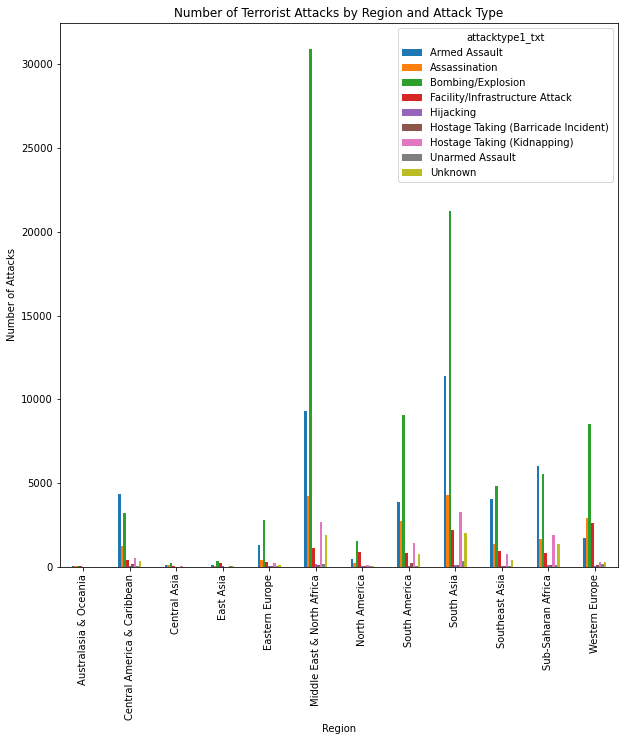

In [23]:
# Analyze the data
df.groupby(['region_txt', 'attacktype1_txt'])['eventid'].count().unstack().plot(kind='bar', figsize=(10,10))
plt.title('Number of Terrorist Attacks by Region and Attack Type')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.show()


In [56]:
# for more information on different types of analysis in data science---READ 'information' File